In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sentyabrskiy ru
strathroy ca
hobart au
cidreira br
dikson ru
missoula us
dunedin nz
satitoa ws
yellowknife ca
nanortalik gl
ushuaia ar
hermanus za
faanui pf
upernavik gl
samana do
busselton au
tasiilaq gl
mataura pf
geraldton au
lincoln nz
khatanga ru
mataura pf
albany au
jamestown sh
bredasdorp za
okhotsk ru
eucaliptus bo
taolanaro mg
ponta do sol cv
wanning cn
talnakh ru
cape town za
busselton au
isangel vu
sentyabrskiy ru
ginir et
hermanus za
macaboboni ph
vila franca do campo pt
hilo us
we nc
krasnaya gorka ru
dingle ie
marcona pe
kapaa us
vaini to
ouadda cf
port alfred za
avera pf
alofi nu
cedar city us
ixtapa mx
mahebourg mu
castro cl
chuy uy
nikolskoye ru
thyolo mw
harper lr
puksoozero ru
rawson ar
guatire ve
bengkulu id
east london za
puerto ayora ec
jamestown sh
ushuaia ar
rikitea pf
upernavik gl
muisne ec
atuona pf
ushuaia ar
teguise es
amderma ru
barrow us
slavsk ru
atuona pf
hobart au
busselton au
barentsburg sj
ushuaia ar
hilo us
rikitea pf
tadine nc
rikitea pf
port blair 

ribeira grande pt
mataura pf
hithadhoo mv
puri in
lagoa pt
srivardhan in
kandrian pg
caravelas br
camopi gf
mahebourg mu
dingzhou cn
ushuaia ar
saint-pierre pm
doha kw
saint-pierre pm
lashio mm
butaritari ki
nikolskoye ru
khatanga ru
hermanus za
port elizabeth za
belushya guba ru
bantry ie
rikitea pf
severo-kurilsk ru
palabuhanratu id
clyde river ca
punta arenas cl
aflu dz
port elizabeth za
arraial do cabo br
barrow us
faanui pf
jamestown sh
lebu cl
bredasdorp za
bamiantong cn
jamestown sh
yulara au
rikitea pf
thompson ca
vaini to
atuona pf
katsuura jp
ystad se
bluff nz
poronaysk ru
kodiak us
thompson ca
arraial do cabo br
esil kz
toktogul kg
kapaa us
ushuaia ar
zyryanka ru
jumla np
atuona pf
upernavik gl
barbar sd
yellowknife ca
longlac ca
severo-kurilsk ru
mullaitivu lk
nikolskoye ru
guerrero negro mx
alta floresta br
kapaa us
klaksvik fo
rikitea pf
port alfred za
kodiak us
namibe ao
lolua tv
saint anthony ca
san juan ar
boueni yt
caravelas br
butaritari ki
cidreira br
bereda so
punt

cape town za
teya ru
ponta do sol cv
mataura pf
punta arenas cl
albany au
la romana do
arlit ne
hithadhoo mv
avarua ck
port elizabeth za
barentsburg sj
ushuaia ar
port hardy ca
vestmannaeyjar is
casa nova br
mtimbira tz
khormuj ir
ushuaia ar
coahuayana mx
ambilobe mg
taolanaro mg
bredasdorp za
chokurdakh ru
mataura pf
hasaki jp
ushuaia ar
faanui pf
pantai remis my
kenai us
ucluelet ca
buraydah sa
uige ao


In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3cd175cf34f0a27688ed9d29c7b577de


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | strathroy
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | missoula
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | satitoa
City not found. Skipping...
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | samana
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | lincoln
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | goderich
Processing Record 39 of Set 4 | pacific grove
Processing Record 40 of Set 4 | meadville
Processing Record 41 of Set 4 | chengde
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | bloomfield
Processing Record 44 of Set 4 | balkanabat
Processing Record 45 of Set 4 | borovoy
Processing Record 46 of Set 4 | zhezkazgan
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | pundaguitan
Processing Record 49 of Set 4 | gigmoto
Processing Record 50 of Set 4 | washougal
Processing Record 1 of Set 5 | solnechnyy
Processing Record 2 of Set 5 | gold coast
Processing Record 3 of Set 5 | arkhangelsk
Processing Record 4 of Set 5 | tual
Processing Record 5 of Set 5 | pittsfield
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | hovd
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | kalulushi
Processing Record 10 of Set 5 | omsukchan
Processing Record 11 of Set 5 | vallenar
Processing Recor

Processing Record 28 of Set 8 | yulara
Processing Record 29 of Set 8 | ystad
Processing Record 30 of Set 8 | poronaysk
Processing Record 31 of Set 8 | esil
Processing Record 32 of Set 8 | toktogul
Processing Record 33 of Set 8 | zyryanka
Processing Record 34 of Set 8 | jumla
Processing Record 35 of Set 8 | barbar
City not found. Skipping...
Processing Record 36 of Set 8 | longlac
City not found. Skipping...
Processing Record 37 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 38 of Set 8 | alta floresta
Processing Record 39 of Set 8 | lolua
City not found. Skipping...
Processing Record 40 of Set 8 | boueni
Processing Record 41 of Set 8 | bereda
Processing Record 42 of Set 8 | kichera
Processing Record 43 of Set 8 | lerwick
Processing Record 44 of Set 8 | half moon bay
Processing Record 45 of Set 8 | ostrovnoy
Processing Record 46 of Set 8 | belmonte
Processing Record 47 of Set 8 | port hardy
Processing Record 48 of Set 8 | saint-augustin
Processing Record 49 of Set 8

Processing Record 11 of Set 12 | qaqortoq
Processing Record 12 of Set 12 | dunhua
Processing Record 13 of Set 12 | lovozero
Processing Record 14 of Set 12 | pangody
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | yantal
Processing Record 17 of Set 12 | la serena
Processing Record 18 of Set 12 | comodoro rivadavia
Processing Record 19 of Set 12 | saeby
Processing Record 20 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 21 of Set 12 | caconda
Processing Record 22 of Set 12 | talaya
Processing Record 23 of Set 12 | sechura
Processing Record 24 of Set 12 | henties bay
Processing Record 25 of Set 12 | iberia
Processing Record 26 of Set 12 | freetown
Processing Record 27 of Set 12 | coffs harbour
Processing Record 28 of Set 12 | mao
Processing Record 29 of Set 12 | chopovychi
Processing Record 30 of Set 12 | yankton
Processing Record 31 of Set 12 | coracora
Processing Record 32 of Set 12 | zemio
Processing Record 33 of Set 12 | along
Process

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Strathroy,42.9551,-81.6223,72.48,71,99,10.74,CA,2021-09-12 14:14:58
1,Hobart,-42.8794,147.3294,45.27,80,75,6.91,AU,2021-09-12 14:14:58
2,Cidreira,-30.1811,-50.2056,67.08,76,5,14.97,BR,2021-09-12 14:14:58
3,Dikson,73.5069,80.5464,40.73,85,17,7.87,RU,2021-09-12 14:14:59
4,Missoula,47.0166,-113.8009,38.10,85,25,1.68,US,2021-09-12 14:14:59
5,Dunedin,-45.8742,170.5036,54.81,83,100,3.00,NZ,2021-09-12 14:10:57
6,Yellowknife,62.4560,-114.3525,46.92,100,75,9.22,CA,2021-09-12 14:14:59
7,Nanortalik,60.1432,-45.2371,40.24,94,100,11.90,GL,2021-09-12 14:15:00
8,Ushuaia,-54.8000,-68.3000,40.66,60,75,3.44,AR,2021-09-12 14:15:00
9,Hermanus,-34.4187,19.2345,56.89,81,100,11.39,ZA,2021-09-12 14:15:00


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Strathroy,CA,2021-09-12 14:14:58,42.9551,-81.6223,72.48,71,99,10.74
1,Hobart,AU,2021-09-12 14:14:58,-42.8794,147.3294,45.27,80,75,6.91
2,Cidreira,BR,2021-09-12 14:14:58,-30.1811,-50.2056,67.08,76,5,14.97
3,Dikson,RU,2021-09-12 14:14:59,73.5069,80.5464,40.73,85,17,7.87
4,Missoula,US,2021-09-12 14:14:59,47.0166,-113.8009,38.10,85,25,1.68
5,Dunedin,NZ,2021-09-12 14:10:57,-45.8742,170.5036,54.81,83,100,3.00
6,Yellowknife,CA,2021-09-12 14:14:59,62.4560,-114.3525,46.92,100,75,9.22
7,Nanortalik,GL,2021-09-12 14:15:00,60.1432,-45.2371,40.24,94,100,11.90
8,Ushuaia,AR,2021-09-12 14:15:00,-54.8000,-68.3000,40.66,60,75,3.44
9,Hermanus,ZA,2021-09-12 14:15:00,-34.4187,19.2345,56.89,81,100,11.39


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

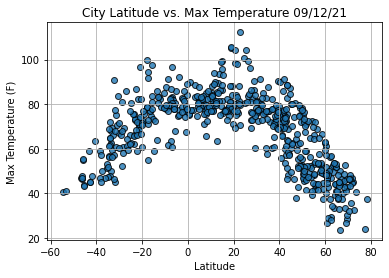

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

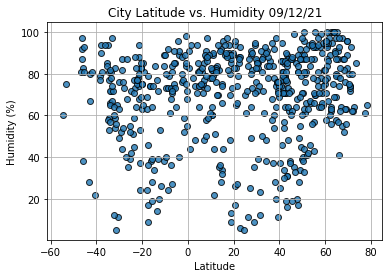

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

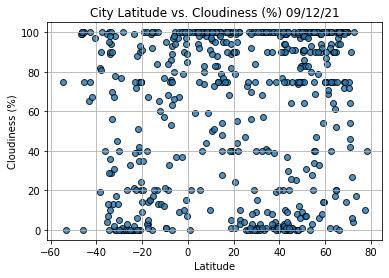

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

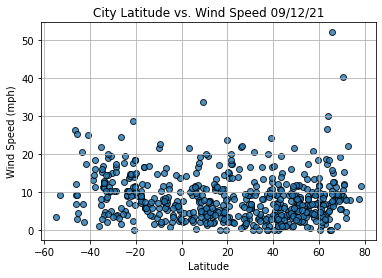

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()